NAME : GOKULACHALAM
PROJECT : HEART DISEASE PREDICTION


WORKING:
 IN THIS MODEL WE ARE GOING TO PREDICT WHETHERE A PERSON HAS A HEART DISEASE OR NOT.BY USING THE ENSEMBLE LEARNING - BOOSTING.WE ARE GOING TO ANALYSE THE PERFORMANCE OF VARIOUS MODELS HERE.THIS MODEL IS AN END TO END MODEL WITH A USER INTERFACE.

**END TO END MODEL BUILDING FOR HEART DISEASE PREDICTION**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv("heart (1).csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [19]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
data.shape

(1025, 14)

In [21]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
data_dup = data.duplicated().any()
data_dup

True

In [23]:
data = data.drop_duplicates()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [24]:
data_dup = data.duplicated().any()
data_dup

False

In [25]:
cate_val = [] 
cont_val = []
for column in data.columns:
    if data[column].nunique () <=10:
        cate_val.append(column)

    else:
        cont_val.append(column)

In [26]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [27]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [28]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [29]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
st = StandardScaler()

In [32]:
data[cont_val] = st.fit_transform(data[cont_val])

<ipython-input-32-c1cf635eae04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cont_val] = st.fit_transform(data[cont_val])
c:\Users\Gokul\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [33]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [34]:
X = data.drop('target', axis=1)
y = data['target']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,
random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log = LogisticRegression()

In [40]:
log.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_pred1 = log.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
print("THE ACCURACY OF THE LOGISTIC REGRESSION MODEL IS :",accuracy_score(y_test,y_pred1)*100)

THE ACCURACY OF THE LOGISTIC REGRESSION MODEL IS : 78.68852459016394


In [44]:
from sklearn import svm

In [45]:
svm = svm.SVC()

In [46]:
svm.fit(X_train,y_train)

SVC()

In [47]:
y_pred2 = svm.predict(X_test)

In [48]:
print("THE ACCURACY OF THE SVC MODEL IS :",accuracy_score(y_test,y_pred2)*100)

THE ACCURACY OF THE SVC MODEL IS : 83.60655737704919


In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
y_pred3 = knn.predict(X_test)

In [53]:
print("THE ACCURACY OF THE KNN MODEL IS :",accuracy_score(y_test,y_pred3)*100)

THE ACCURACY OF THE KNN MODEL IS : 73.77049180327869


In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt = DecisionTreeClassifier()

In [56]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
y_pred4 = dt.predict(X_test)

In [58]:
print("THE ACCURACY OF THE dt MODEL IS :",accuracy_score(y_test,y_pred4)*100)

THE ACCURACY OF THE dt MODEL IS : 72.1311475409836


In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf = RandomForestClassifier()

In [61]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
y_pred5 = rf.predict(X_test)

In [63]:
print("THE ACCURACY OF THE RANDOM FOREST MODEL IS :",accuracy_score(y_test,y_pred5))

THE ACCURACY OF THE RANDOM FOREST MODEL IS : 0.8524590163934426


In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
gbc = GradientBoostingClassifier()

In [66]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [67]:
y_pred6 = gbc.predict(X_test)

In [68]:
print("THE ACCURACY OF THE GRADIENT BOOST MODEL IS :",accuracy_score(y_test,y_pred6)*100)

THE ACCURACY OF THE GRADIENT BOOST MODEL IS : 80.32786885245902


In [69]:
final_data = pd.DataFrame ({ 'Models': ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'], 'ACC': [accuracy_score (y_test, y_pred1) *100, accuracy_score (y_test, y_pred2) *100, accuracy_score (y_test, y_pred3) *100, accuracy_score (y_test, y_pred4) *100, accuracy_score (y_test, y_pred5) *100, accuracy_score (y_test, y_pred6) *100]})

In [70]:
final_data

,Models,ACC
0,LR,78.688525
1,SVM,83.606557
2,KNN,73.770492
3,DT,72.131148
4,RF,85.245902
5,GB,80.327869


c:\Users\Gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

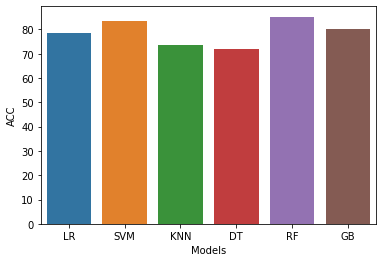

In [71]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [72]:
X=data.drop('target', axis=1)
y=data['target']

In [73]:
from sklearn. ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [75]:
new_data = pd.DataFrame({
'age':52,
'sex': 1,
'cp': 0,
'trestbps':125,
'chol' :212,
'fbs': 0,
'restecg': 1,
'thalach':168,
'exang': 0,
'oldpeak':1.0,
'slope':2,
'ca':2,
'thal':3,}, index=[0])

In [76]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [77]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [78]:
p = log.predict(new_data)
if p[0]==0:
    print ("No Disease")
else:
    print ("Disease")

No Disease


In [93]:
from sklearn.ensemble import VotingClassifier
models=[('lr',log),('svm',svm),('rf',rf),('dt',dt),('knn',knn),('gbc',gbc)]
voting=VotingClassifier(estimators=models,voting='hard')
voting.fit(X_train,y_train)
y_pred7 = voting.predict(X_test)

In [94]:
print("THE ACCURACY OF THE VOTING MODEL IS :",accuracy_score(y_test,y_pred7)*100)

THE ACCURACY OF THE VOTING MODEL IS : 83.60655737704919


In [79]:
import joblib
joblib.dump(rf, 'model_joblib_heart')


['model_joblib_heart']

In [80]:
model = joblib.load('model_joblib_heart')


In [81]:
model.predict(new_data)

array([0], dtype=int64)

In [95]:
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()